<a href="https://colab.research.google.com/github/xychong/edgeaimonitoring/blob/main/Preprocessing/Audio_Feature_Extraction_%5BMusic%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import librosa, librosa.display
import numpy as np
import os
import IPython

# make plot outputs appear and be stored within notebook
%matplotlib inline

import sklearn
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pathname = "/content/drive/MyDrive/FYP Data/Trimmed Data/Music Playing/"

In [ ]:
audiopath = pathname + "/" + "music 1.wav"
audio_data, sr = librosa.load(audiopath, 44100)
IPython.display.Audio(data=audio_data, rate=sr)

In [ ]:
# Visualising amplitude envelope waveform for all the audio files

for filename in os.listdir(pathname):
  audiopath = pathname + "/" + filename
  x, sr = librosa.load(audiopath, 44100)
  plt.figure(figsize = (20,5))
  librosa.display.waveplot(x, sr=sr)
  plt.xlabel("Time (in seconds)")
  plt.ylabel("Amplitude")

### Noise Reduction

Original audio file:


Text(0, 0.5, 'Amplitude')

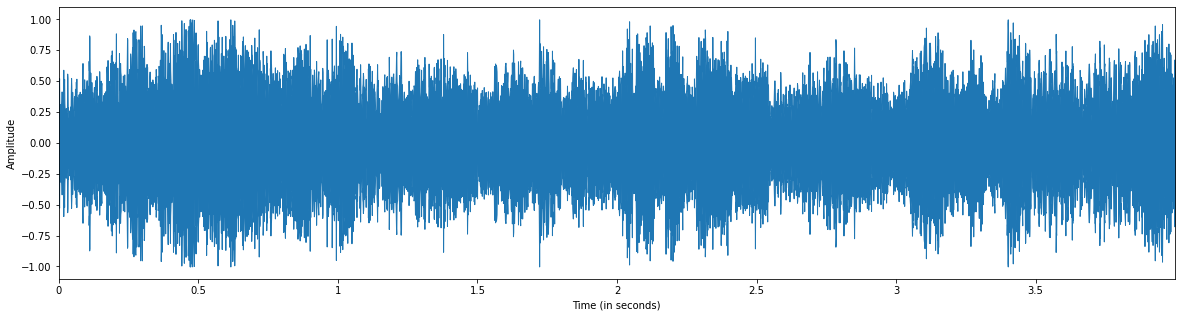

In [ ]:
import noisereduce as nr

# Noise reduction
noisy_part = audio_data[0:25000]  
reduced_noise = nr.reduce_noise(y=audio_data, sr=sr)

# Visualize
print("Original audio file:")
plt.figure(figsize = (20,5))
librosa.display.waveplot(audio_data, sr=sr)
plt.xlabel("Time (in seconds)")
plt.ylabel("Amplitude")

Noise removed audio file:


Text(0, 0.5, 'Amplitude')

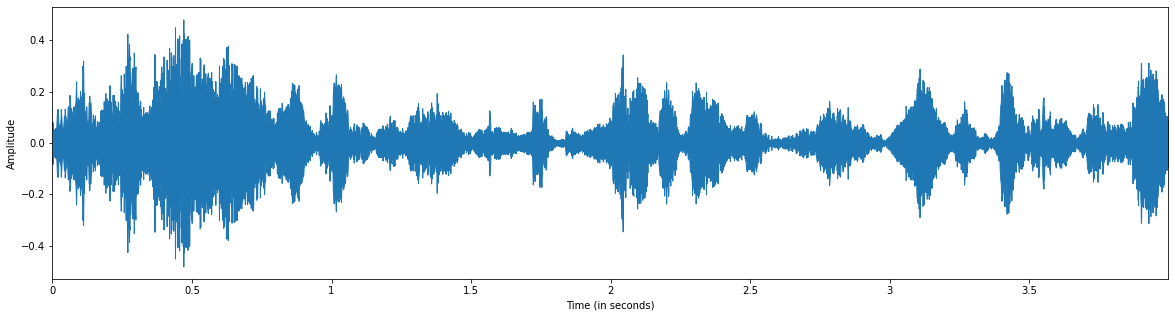

In [ ]:
# Visualize
print("Noise removed audio file:")
plt.figure(figsize = (20,5))
librosa.display.waveplot(reduced_noise, sr=sr)
plt.xlabel("Time (in seconds)")
plt.ylabel("Amplitude")

In [ ]:
# Less noise but lower quality because some parts of the music got removed as well
# Since I have already manually listened to all the audio tracks, noise removal may not be necessary
IPython.display.Audio(data=reduced_noise, rate=sr)

### Mel Frequency Cepstral Coefficients (MFCC)
##### Small set of features (10-20) which concisely describe the overall shape of a spectral envelope
##### MFCCs: Coefficients that collectively make up MFC
##### Mel-Frequency Cepstrum (MFC) is a representation of the short-term power spectrum of a sound, based on a linear consine transform of a log power spectrum on a nonlinear mel scale of frequecy
##### Mel Scale relates perceived frequency of a tone to its actual frequency. Humans are better at discerning small changes in pitch at low frequencies than at high frequencies. Incorporating melscale makes our features match more closely what humans hear. 

In [ ]:
for filename in os.listdir(pathname):
  audiopath = pathname + "/" + filename
  x, sr = librosa.load(audiopath, 44100)
  X = librosa.stft(x)
  mfccs = librosa.feature.mfcc(x , sr=sr)
  print(mfccs.shape)

(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)
(20, 345)


This means that 20 mfccs are calculated on 345 frames for all music audio tracks.

In [ ]:
import pandas as pd

In [ ]:
df_mfcc = pd.DataFrame(columns = ['Class', 'Filename', 'MFCC'])

In [ ]:
for filename in os.listdir(pathname):
  audiopath = pathname + "/" + filename
  x, sr = librosa.load(audiopath, 44100)
  mfccs = librosa.feature.mfcc(x , sr=sr)
  df_mfcc = df_mfcc.append({'Class': "Music",'Filename': filename,'MFCC': mfccs}, ignore_index=True)

In [ ]:
df_mfcc

,Class,Filename,MFCC
0,Music,music 1.wav,"[[-121.154045, -124.92854, -145.96223, -150.79..."
1,Music,music 2.wav,"[[-194.86186, -194.30385, -202.84694, -209.288..."
2,Music,music 3.wav,"[[-119.01761, -126.70586, -146.28482, -154.554..."
3,Music,music 4.wav,"[[-111.71534, -104.414734, -119.97326, -127.86..."
4,Music,music 5.wav,"[[-150.91762, -148.85349, -150.46527, -140.740..."
...,...,...,...
243,Music,music 244.wav,"[[-373.39365, -371.43674, -374.19965, -369.862..."
244,Music,music 245.wav,"[[-253.26617, -253.95961, -264.03442, -266.633..."
245,Music,music 246.wav,"[[-292.3727, -295.22885, -305.57056, -303.451,..."
246,Music,music 247.wav,"[[-363.65045, -361.13754, -371.94153, -373.211..."


In [ ]:
# Display the MFCCs for all audio tracks
for filename in os.listdir(pathname):
  audiopath = pathname + "/" + filename
  x, sr = librosa.load(audiopath, 44100)
  mfccs = librosa.feature.mfcc(x , sr=sr)
  mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
  plt.figure(figsize=(15,8))
  librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [ ]:
# Convert MFCCs to numpy array
mfcc_col = df_mfcc['MFCC']
mfcc_list = np.array(df_mfcc['MFCC'].values.tolist())

In [ ]:
mfcc_list_final = []
for listoflist in mfcc_list:
    mfcc_list_final.append(listoflist)

In [ ]:
# Number of lists in total
# Each list represents mfccs of 1 audio track
print(len(mfcc_list_final))

248


### Spectrogram


In [ ]:
df_spec = pd.DataFrame(columns = ['Class', 'Filename', 'Spectrogram'])

In [ ]:
# Plot the spectrogram using librosa.display.specshow
# Visual representation of spectrum of frequencies of a signal as it varies with time
for filename in os.listdir(pathname):
  audiopath = pathname + "/" + filename
  x, sr = librosa.load(audiopath, 44100)
  X = librosa.stft(x)
  Xdb = librosa.amplitude_to_db(abs(X))
  df_spec = df_spec.append({'Class': "Music",'Filename': filename,'Spectrogram': Xdb}, ignore_index=True)

In [ ]:
df_spec

,Class,Filename,Spectrogram
0,Music,music 1.wav,"[[18.73605, 12.637281, -33.239502, -33.239502,..."
1,Music,music 2.wav,"[[11.179588, 4.757964, -22.22909, -32.08494, -..."
2,Music,music 3.wav,"[[9.464912, 2.3397555, -9.023197, -10.738461, ..."
3,Music,music 4.wav,"[[26.262445, 20.19635, -29.484415, -33.52617, ..."
4,Music,music 5.wav,"[[19.431335, 13.459486, -22.257442, -23.079908..."
...,...,...,...
243,Music,music 244.wav,"[[-7.3141575, -4.7135296, -7.586094, -3.301203..."
244,Music,music 245.wav,"[[16.158083, 18.860605, 22.169567, 23.571495, ..."
245,Music,music 246.wav,"[[-2.0471656, -5.889306, -18.778284, -43.38791..."
246,Music,music 247.wav,"[[11.317658, 11.591642, 10.93462, 1.175301, 12..."


In [ ]:
# Convert Spectrogram values to numpy array
spec_col = df_spec['Spectrogram']
spec_list = np.array(df_spec['Spectrogram'].values.tolist())

In [ ]:
spec_list_final = []
for listoflist in spec_list:
    spec_list_final.append(listoflist)

In [ ]:
print(len(spec_list_final))

248


In [ ]:
print(spec_list_final)

[array([[ 18.73605 ,  12.637281, -33.239502, ..., -28.172228, -30.578514,
        -32.359795],
       [ 18.965832,  12.808403, -25.096415, ..., -33.239502, -33.239502,
        -20.994709],
       [ 19.593546,  13.519243, -17.59741 , ..., -20.402613, -22.902771,
        -15.550494],
       ...,
       [-33.239502, -33.239502, -33.239502, ..., -33.239502, -33.239502,
        -29.5597  ],
       [-33.239502, -33.239502, -33.239502, ..., -33.239502, -33.239502,
        -29.482805],
       [-33.239502, -33.239502, -33.239502, ..., -33.239502, -33.239502,
        -29.395592]], dtype=float32), array([[ 11.179588 ,   4.757964 , -22.22909  , ..., -12.433424 ,
         13.97667  ,  29.523954 ],
       [ 10.994612 ,   5.402971 , -20.182377 , ...,  -3.6921918,
         12.422609 ,  29.40655  ],
       [ 11.179754 ,   4.451536 , -13.220128 , ...,   6.701207 ,
         13.254637 ,  29.84213  ],
       ...,
       [-32.08494  , -32.08494  , -32.08494  , ..., -32.08494  ,
        -32.08494  , -32.0849

In [ ]:
for filename in os.listdir(pathname):
  audiopath = pathname + "/" + filename
  x, sr = librosa.load(audiopath, 44100)
  X = librosa.stft(x)
  Xdb = librosa.amplitude_to_db(abs(X))  
  plt.figure(figsize=(20,5))
  librosa.display.specshow(Xdb, sr=sr, x_axis = 'time', y_axis='log')
  plt.colorbar()

### Mel Spectrogram
##### Spectrogram with the Mel Scale as y axis

In [ ]:
df_melspec = pd.DataFrame(columns = ['Class', 'Filename', 'Mel Spectrogram'])

In [ ]:
# Window size = 2048
# Hop size = 512
# Compute FFT for each window
# Take entire frequency spectrum and separate into 128 evenly spaced frequencies (spaced based on distance heard by human ear)
# For each window, decompose magnitude of signal into its components, corresponding to the frequencies in melscale
for filename in os.listdir(pathname):
  audiopath = pathname + "/" + filename
  y, sr = librosa.load(audiopath, 44100)
  mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft = 2048, hop_length = 512, n_mels=128)
  mel_spect_db = librosa.power_to_db(mel_spect, ref=np.max)
  df_melspec = df_melspec.append({'Class': "Music",'Filename': filename,'Mel Spectrogram': mel_spect_db}, ignore_index=True)

In [ ]:
df_melspec

,Class,Filename,Mel Spectrogram
0,Music,music 1.wav,"[[-24.391712, -30.50704, -63.75795, -60.793938..."
1,Music,music 2.wav,"[[-35.80621, -41.904957, -62.511448, -66.89422..."
2,Music,music 3.wav,"[[-32.75732, -38.418163, -55.053802, -59.99534..."
3,Music,music 4.wav,"[[-19.1367, -25.134375, -56.626556, -59.75389,..."
4,Music,music 5.wav,"[[-25.951311, -31.965744, -58.106537, -55.9996..."
...,...,...,...
243,Music,music 244.wav,"[[-21.056995, -19.800457, -21.940212, -24.0349..."
244,Music,music 245.wav,"[[-21.82644, -19.623747, -16.847565, -16.18129..."
245,Music,music 246.wav,"[[-31.38536, -32.857697, -34.008926, -35.75728..."
246,Music,music 247.wav,"[[-18.889645, -19.782156, -20.120472, -13.6197..."


In [ ]:
melspec_col = df_melspec['Mel Spectrogram']
melspec_list = np.array(df_melspec['Mel Spectrogram'].values.tolist())

In [ ]:
melspec_list_final = []
for listoflist in melspec_list:
    melspec_list_final.append(listoflist)

In [ ]:
print(len(melspec_list_final))

248


In [ ]:
print(melspec_list_final)

[array([[-24.391712, -30.50704 , -63.75795 , ..., -67.24304 , -69.49031 ,
        -61.29016 ],
       [-22.576672, -28.475378, -52.832146, ..., -59.70858 , -53.15574 ,
        -51.440506],
       [-21.987774, -28.437462, -39.879078, ..., -54.669838, -50.42431 ,
        -51.233307],
       ...,
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -72.505585],
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -72.674034],
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -72.760086]], dtype=float32), array([[-35.80621 , -41.904957, -62.511448, ..., -43.0559  , -34.056572,
        -17.272608],
       [-34.91425 , -40.56149 , -54.379395, ..., -35.90355 , -32.6655  ,
        -15.675184],
       [-37.023323, -40.268166, -43.660507, ..., -36.023064, -33.609158,
        -14.077919],
       ...,
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ],
       [-80.      

In [ ]:
for filename in os.listdir(pathname):
  audiopath = pathname + "/" + filename
  y, sr = librosa.load(audiopath, 44100)
  mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
  mel_spect_db = librosa.power_to_db(mel_spect, ref=np.max)
  plt.figure(figsize=(20,5))
  librosa.display.specshow(mel_spect_db, sr=sr, x_axis = 'time', y_axis='mel')
  plt.colorbar()